In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal
from scipy.special import digamma
import data, random

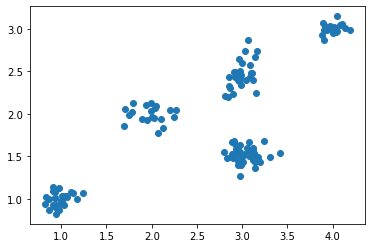

In [2]:
centers_x = [1, 2,   3,   3, 4]
centers_y = [1, 2, 1.5, 2.5, 3]
covs = [np.array([[1, 0],[0, 1]]), 
        np.array([[2, 0.3],[0.3, 1]]),
        np.array([[2, -0.3],[-0.3, 1]]),
        np.array([[1, 0.3],[0.3, 2]]), 
        np.array([[0.5, 0.1],[0.1, 0.5]])]
datanums = [30, 20, 40, 30, 20]

data = []

for i in range(5):
    p = multivariate_normal((centers_x[i], centers_y[i]), covs[i]/100)
    data.extend(p.rvs(datanums[i]))
    
random.shuffle(data)
#print(data)

plt.scatter([x for (x,y) in data], [y for (x,y) in data])
    


In [3]:
K = 10

def initial_r(data):
    rs = []
    for i,d in enumerate(data):
        r = [0]*K
        r[i%10] = 1.0
        
        rs.append(r)
        
    return rs

In [4]:
rs = initial_r(data)

In [5]:
def weighted_num(k, rs):
    return sum([r[k] for r in rs])

def weighted_mean(k, rs, data):
    return sum([ r[k]*p for (r, p) in zip(rs, data)])/weighted_num(k, rs)
    
def weighted_cov(k, rs, data):
    xbar = weighted_mean(k, rs, data)
    return sum([ r[k]*(p-xbar).reshape((2, 1)).dot((p-xbar).reshape((2, 1)).T) for (r, p) in zip(rs, data)])/weighted_num(k, rs)

In [6]:
ns = [weighted_num(k, rs) for k in range(K)]
xs = [weighted_mean(k, rs, data) for k in range(K)]
covs = [weighted_cov(k, rs, data) for k in range(K)]

In [7]:
print(ns)
print(xs)
print(covs)

[14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0, 14.0]
[array([2.74447573, 1.88728352]), array([2.87687788, 2.23123391]), array([2.362229  , 1.86817926]), array([2.45453863, 1.73954276]), array([2.6106604 , 2.01719058]), array([2.71889986, 1.94061551]), array([2.6819981 , 2.09969107]), array([2.65393345, 1.74376618]), array([2.25360704, 1.64928653]), array([2.38141011, 1.69054323])]
[array([[1.20619047, 0.74271587],
       [0.74271587, 0.59500407]]), array([[0.69806284, 0.38908885],
       [0.38908885, 0.3727808 ]]), array([[1.06268667, 0.5452966 ],
       [0.5452966 , 0.4612213 ]]), array([[1.07764145, 0.53486001],
       [0.53486001, 0.47867154]]), array([[0.67483135, 0.35101907],
       [0.35101907, 0.36555738]]), array([[0.74251716, 0.40664607],
       [0.40664607, 0.42761383]]), array([[0.65186165, 0.32463271],
       [0.32463271, 0.2791476 ]]), array([[1.02825376, 0.48522333],
       [0.48522333, 0.47224413]]), array([[1.15053153, 0.58391992],
       [0.58391992, 0.44204031

In [8]:
def update_params(org_alpha, org_beta, org_nu, org_m, org_w_inv, k, ns, xs, covs):
    alpha = org_alpha + ns[k]
    beta = org_beta + ns[k]
    nu = org_nu + ns[k]
    m = (org_beta * org_m + ns[k]*xs[k])/beta
    w_inv = org_w_inv + ns[k]*covs[k] + (org_beta*ns[k])/(org_beta + ns[k])*(xs[k] - org_m).reshape((2,1)).dot((xs[k] - org_m).reshape((2,1)).T)
    
    return (alpha, beta, nu, m, w_inv)

In [9]:
alphas = [1]*K
betas = [1]*K
nus = [1]*K
ms = [np.array([0,0])]*K
w_invs = [np.array([[1, 0],[0, 1]])]*K

for k in range(K):
    params = update_params(alphas[k], betas[k], nus[k], ms[k], w_invs[k], k, ns, xs, covs)
    alphas[k] = params[0]
    betas[k] = params[1]
    nus[k] = params[2]
    ms[k] = params[3]
    w_invs[k] = params[4]
    
print(alphas)
print(betas)
print(nus)
print(ms)
print(w_invs)

[15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0]
[15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0]
[15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0, 15.0]
[array([2.56151069, 1.76146462]), array([2.68508602, 2.08248499]), array([2.20474706, 1.74363398]), array([2.29090273, 1.62357324]), array([2.43661638, 1.88271121]), array([2.53763987, 1.81124115]), array([2.50319823, 1.95971167]), array([2.47700456, 1.6275151 ]), array([2.10336657, 1.5393341 ]), array([2.22264943, 1.57784035])]
[array([[24.9166705 , 15.23231907],
       [15.23231907, 12.65444008]]), array([[18.49754441, 11.43829896],
       [11.43829896, 10.86544238]]), array([[21.08573083, 11.75301518],
       [11.75301518, 10.71451908]]), array([[21.71008959, 11.47316337],
       [11.47316337, 10.52567665]]), array([[16.80881685,  9.82938652],
       [ 9.82938652,  9.91559065]]), array([[18.29482888, 10.61762828],
       [10.61762828, 10.50151632]]), array([[16.83963605,  9.80080089],
       [ 9.8008008

In [39]:
def rho(d, k, alphas, betas, nus, ms, w_invs):
    first = digamma(alphas[k]) - digamma(sum(alphas))
    second_2 = digamma((nus[k])/2) + digamma((nus[k] - 1)/2) + np.log(1/np.linalg.det(w_invs[k]))
    third_2 = 2/betas[k] + nus[k]*(d - ms[k]).reshape((2,1)).T.dot(np.linalg.inv(w_invs[k])).dot((d - ms[k]).reshape((2,1)))[0][0]
    
    log_rho = first + second_2/2 - third_2/2
    
    return np.exp(log_rho)

In [43]:
def calc_rs(alphas, betas, nus, ms, w_invs):
    rs = []
    for d in data:
        rhos = [ rho(d, k, alphas, betas, nus, ms, w_invs) for k in range(K)]
        sm = sum(rhos)
        rs.append(rhos/sm)
        
    return rs

rs = calc_rs(alphas, betas, nus, ms, w_invs)

In [44]:
rs

[array([0.09871961, 0.06819903, 0.1155095 , 0.10903377, 0.08636668,
        0.08031354, 0.08495566, 0.08788939, 0.14356528, 0.12544753]),
 array([0.09619115, 0.13221846, 0.09536571, 0.08163082, 0.11741472,
        0.10615818, 0.13702559, 0.0751062 , 0.08069917, 0.07818999]),
 array([0.11605178, 0.08025961, 0.07712285, 0.10819914, 0.08917044,
        0.11579025, 0.08026251, 0.12763551, 0.09928233, 0.10622558]),
 array([0.06465867, 0.11917202, 0.12213865, 0.08888071, 0.12875222,
        0.09514031, 0.13865939, 0.07198712, 0.0898814 , 0.08072951]),
 array([0.06793619, 0.17433674, 0.10944276, 0.07198401, 0.14224483,
        0.10647451, 0.15251181, 0.06098438, 0.0564139 , 0.05767087]),
 array([0.08594986, 0.14562874, 0.10062129, 0.07790128, 0.12573061,
        0.10537727, 0.14570515, 0.06893417, 0.07305499, 0.07109664]),
 array([0.11508208, 0.08051114, 0.07815654, 0.10782408, 0.09041779,
        0.11527183, 0.08145673, 0.12509418, 0.10041443, 0.10577119]),
 array([0.0901699 , 0.14124565, 0.